In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm   
import ipywidgets as widgets

In [2]:
# Capacity
meanC = 100
stdC = 15

# Demand
meanD = 60
stdD = 8

the factor of safety is 1.03


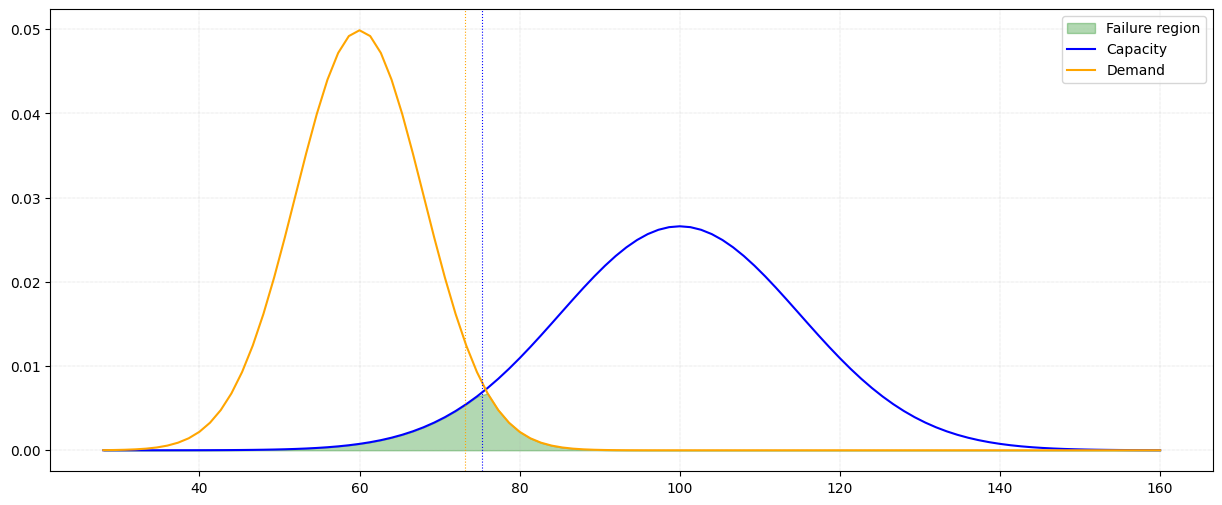

In [3]:
def marginal_identifier(capacityMean, capacityStd, demandMean, demandStd):
    
    # plot prep
    plt.figure(figsize=(15, 6))
    plt.grid(True, which='both', linestyle=':', linewidth=0.35)

    # data prep
    x = np.linspace(min(capacityMean - 4*capacityStd, demandMean - 4*demandStd), max(capacityMean + 4*capacityStd, demandMean + 4*demandStd), 100)
    data1 = norm.pdf(x, capacityMean, capacityStd)
    data2 = norm.pdf(x, demandMean, demandStd)
    overlap = np.minimum(data1, data2)
    capacity_fifth_percentile = norm.ppf(0.05, capacityMean, capacityStd)
    demand_ninety_fifth_percentile = norm.ppf(0.95, demandMean, demandStd)
    print('the factor of safety is {}'.format(round(capacity_fifth_percentile/demand_ninety_fifth_percentile,2)))


    # plot
    plt.fill_between(x, 0, overlap, color='green', alpha=0.3, label='Failure region')
    sns.lineplot(x=x, y=data1, label='Capacity', color='blue')
    sns.lineplot(x=x, y=data2, label='Demand', color='orange')
    plt.axvline(capacity_fifth_percentile, color='blue', linestyle=':', label='5th percentile', linewidth=0.8)
    plt.axvline(demand_ninety_fifth_percentile, color='orange', linestyle=':', label='95th percentile', linewidth=0.8)
    
    plt.show()
    

marginal_identifier(meanC, stdC, meanD, stdD)

In [5]:
def plot_standard_normal_pdf_cdf_with_failure_interactive(mC=100, sC=15, mD=60, sD=8):    
    mean = mC-mD
    std_dev = math.sqrt(sC**2 + sD**2)    
    failure_boundary = 0
    
    # Generate z values
    z = np.linspace(-4, 4, 1000)
    
    # Calculate PDF and CDF
    pdf = norm.pdf(z)
    cdf = norm.cdf(z)
    
    # Calculate the safety/reliability index
    z_failure = (failure_boundary - mean) / std_dev
    
    # Calculate the probability of failure
    prob_failure = norm.cdf(z_failure)
    
    # Create the plot with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    fig.suptitle(f'Standard Normal Distribution: PDF and CDF\nNon-standard Distribution: μ={mean}, σ={std_dev}', fontsize=16)
    
    # Plot PDF
    ax1.plot(z, pdf, 'b-', label='Probability Density Function')
    ax1.fill_between(z[z < z_failure], pdf[z < z_failure], alpha=0.3, color='red', 
                     label=f'Failure Area: {prob_failure:.4f}')
    ax1.axvline(0, color='g', linestyle='--', label='z = 0')
    ax1.axvline(z_failure, color='r', linestyle='--', label=f'z_failure = {z_failure:.4f}')
    ax1.set_xlabel('z')
    ax1.set_ylabel('Probability Density')
    ax1.grid(True)
    ax1.legend()
    
    # Plot CDF
    ax2.plot(z, cdf, 'b-', label='Cumulative Distribution Function')
    ax2.axhline(prob_failure, color='r', linestyle=':', 
                label=f'P(Failure) = {prob_failure:.4f}')
    ax2.axvline(0, color='g', linestyle='--', label='z = 0')
    ax2.axvline(z_failure, color='r', linestyle='--', label=f'z_failure = {z_failure:.4f}')
    
    # Add arrow and annotation for CDF
    ax2.annotate('', xy=(z_failure, prob_failure), xytext=(z_failure, 0),
                 arrowprops=dict(arrowstyle='<->', color='red'))
    ax2.text(z_failure + 0.1, prob_failure/2, f'{prob_failure:.4f}', 
             color='red', va='center', ha='left')
    
    ax2.set_xlabel('z')
    ax2.set_ylabel('Cumulative Probability')
    ax2.grid(True)
    ax2.legend()
    plt.subplots_adjust(bottom=0.08)
    plt.show()

In [ ]:
interactive_plot = widgets.interact(plot_standard_normal_pdf_cdf_with_failure_interactive, 
                                       mC=(0, 200, 0.1), 
                                       sC=(0, 200, 0.1), 
                                       mD=(0, 180, 0.1),  
                                       sD=(0, 180, 0.1))

interactive(children=(FloatSlider(value=100.0, description='mC', max=200.0), FloatSlider(value=15.0, descripti…